In [125]:
import os
import numpy as np
import math
from PIL import Image, ImageDraw
from IPython.display import display

In [8]:
with open("outputStone.txt", "r") as f:
    s = f.read()
lines = s.split('\n')
lines.append("0 0 0 0 0")

group = []
alldata = []

nowTime = 0

for line in lines:
    if line == "":
        continue
    content = line.split(' ')
    time = int(content[0])
    x = int(content[1])
    y = int(content[2])
    z = int(content[3])
    d = int(content[4])
    
    if time < nowTime or time - nowTime > 5000:
        if len(group) == 19:
            alldata.append(group)
        group = []
    group.append([time, x, y, z, d])
    nowTime = time
    
    

[[[71594, 72703, 72744, 1074688, 35], [71605, 72733, 77056, 1072832, 235], [72243, 74636, 75615, 1073664, 84], [73106, 76401, 77332, 1073344, 70], [73529, 74619, 72475, 1073216, 52], [74587, 75040, 75392, 1073664, 65], [74788, 75716, 72854, 1073600, 197], [75488, 74628, 75899, 1073664, 209], [75498, 74713, 76015, 1073600, 133], [75798, 74740, 76081, 1073600, 98], [76320, 77684, 74852, 1073600, 1], [76474, 77669, 75498, 1073728, 9], [77774, 75025, 75374, 1073664, 133], [77907, 75108, 75777, 1073600, 53], [78615, 74805, 72887, 1073600, 162], [79340, 77567, 74413, 1073664, 242], [79820, 73815, 77252, 1073600, 100], [79820, 77485, 76131, 1073664, 250], [80326, 73923, 73182, 1073600, 167]], [[181549, 72735, 77056, 1072832, 235], [182314, 74802, 75303, 1073664, 84], [183069, 76393, 77321, 1073344, 70], [183617, 74619, 72475, 1073216, 52], [184712, 75709, 72886, 1073600, 197], [184964, 75085, 77749, 1073728, 65], [185312, 75914, 72930, 1073664, 209], [185569, 72805, 75814, 1073664, 133], [185

In [52]:
for data in alldata:
    print("========")
    for line in data:
        print(line)

[71594, 72703, 72744, 1074688, 35]
[71605, 72733, 77056, 1072832, 235]
[72243, 74636, 75615, 1073664, 84]
[73106, 76401, 77332, 1073344, 70]
[73529, 74619, 72475, 1073216, 52]
[74587, 75040, 75392, 1073664, 65]
[74788, 75716, 72854, 1073600, 197]
[75488, 74628, 75899, 1073664, 209]
[75498, 74713, 76015, 1073600, 133]
[75798, 74740, 76081, 1073600, 98]
[76320, 77684, 74852, 1073600, 1]
[76474, 77669, 75498, 1073728, 9]
[77774, 75025, 75374, 1073664, 133]
[77907, 75108, 75777, 1073600, 53]
[78615, 74805, 72887, 1073600, 162]
[79340, 77567, 74413, 1073664, 242]
[79820, 73815, 77252, 1073600, 100]
[79820, 77485, 76131, 1073664, 250]
[80326, 73923, 73182, 1073600, 167]
[181549, 72735, 77056, 1072832, 235]
[182314, 74802, 75303, 1073664, 84]
[183069, 76393, 77321, 1073344, 70]
[183617, 74619, 72475, 1073216, 52]
[184712, 75709, 72886, 1073600, 197]
[184964, 75085, 77749, 1073728, 65]
[185312, 75914, 72930, 1073664, 209]
[185569, 72805, 75814, 1073664, 133]
[185873, 73539, 77169, 1072896, 98]

In [53]:
for data in alldata:
    print("========")
    for line in data:
        if line[4] == 35:
            print(line)

[71594, 72703, 72744, 1074688, 35]
[187640, 74093, 74666, 1073664, 35]
[70262, 72703, 72744, 1074688, 35]
[76427, 74752, 75379, 1073728, 35]
[180364, 72703, 72744, 1074688, 35]
[70262, 72703, 72744, 1074688, 35]
[76172, 74480, 75076, 1073600, 35]
[186182, 74524, 75115, 1073600, 35]
[71073, 72703, 72744, 1074688, 35]
[187166, 76461, 77362, 1073024, 35]
[70656, 72703, 72744, 1074688, 35]
[186727, 74752, 75379, 1073728, 35]
[76209, 74770, 75400, 1073664, 35]
[186271, 75207, 75906, 1073600, 35]
[270973, 72540, 72501, 1078848, 35]
[397995, 72703, 72744, 1074688, 35]
[507983, 72703, 72744, 1074688, 35]
[70089, 72703, 72744, 1074688, 35]
[70128, 72703, 72744, 1074688, 35]
[180173, 72703, 72744, 1074688, 35]


In [111]:
center = [74903, 75284]
p1 = [74169, 75398]
p2 = [74280, 75666]
plotCenter = [400, 400]

def getPos(x, y):
    X = -(x - center[0]) / 64 * 10 + plotCenter[0]
    Y = -(y - center[1]) / 64 * 10 + plotCenter[1]
    return Y, X

def getVarPos(x, y, theta, r):
    Theta = theta / 256 * 2 * math.pi
    X = x - r * math.sin(Theta)
    Y = y - r * math.cos(Theta)
    return X, Y

def drawCircle(x, y, r, draw, outline, fill):
    X, Y = getPos(x, y)
    draw.ellipse([X - r, Y - r, X + r, Y + r], outline=outline, fill=fill)
    
def drawCirclePos(x, y, r, draw, outline, fill):
    draw.ellipse([x - r, y - r, x + r, y + r], outline=outline, fill=fill)

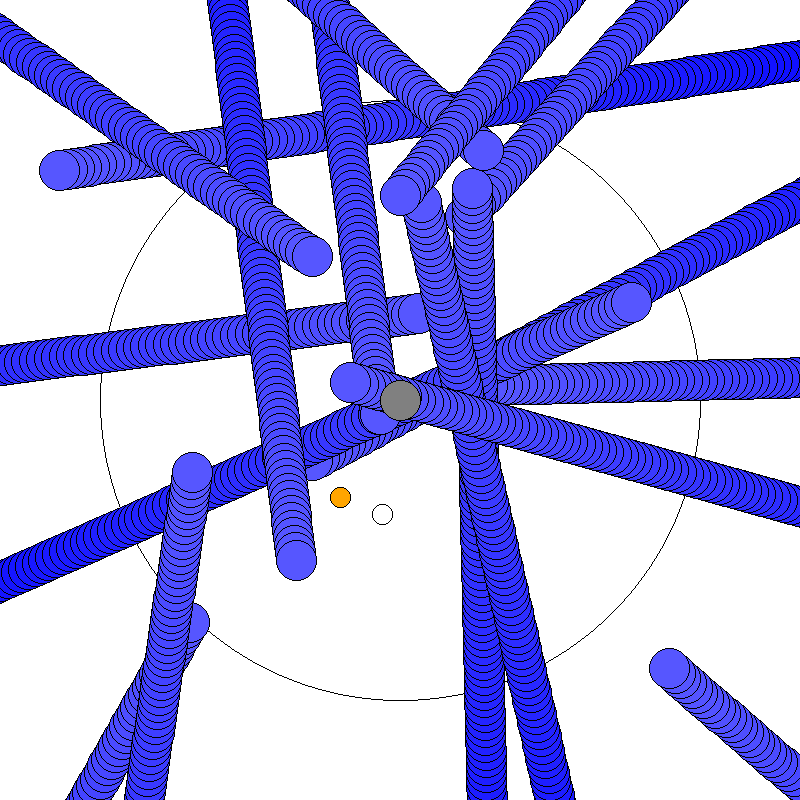

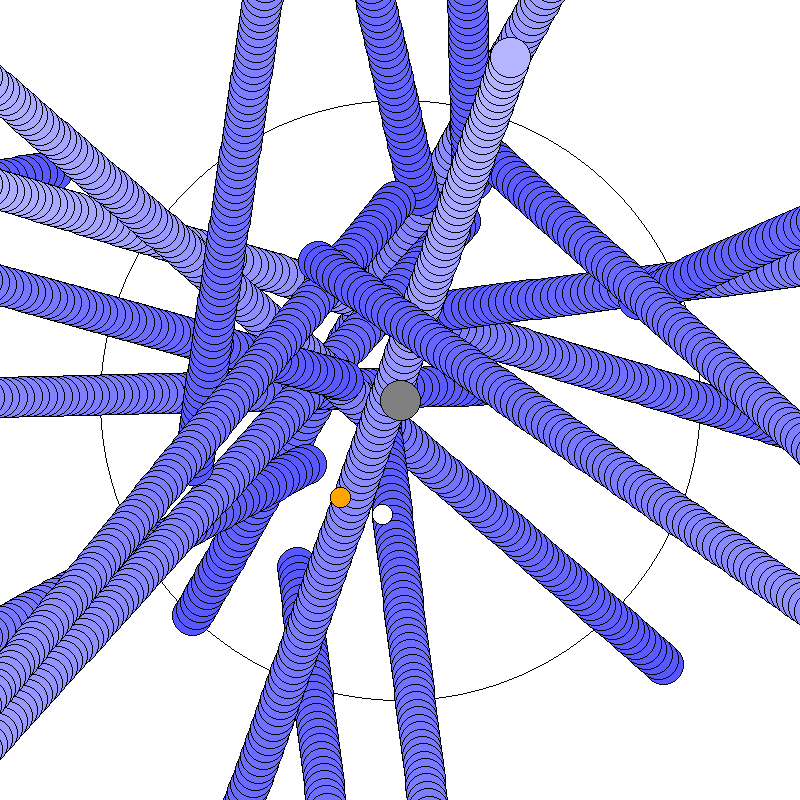

In [140]:



# battle = alldata[7]
# for line in battle:
#     drawCircle(line[1], line[2], 20, draw, 'black', 'red')

baseTime = [70000, 180000, 266000, 395000, 506000, 1000000000]


def sim(start, final):
    im = Image.new('RGB', (800, 800), 'white')
    draw = ImageDraw.Draw(im)

    drawCircle(center[0], center[1], 300, draw, 'black', 'white')
    
    n = 0
    for battle in alldata:
        n += 1
        if n != 8:
            continue
        for line in battle:
            if line[4] < 10000:
                # drawCircle(line[1], line[2], 20, draw, 'black', 'red')
                X, Y = getPos(line[1], line[2])

                nowBaseTime = 0
                for i in range(5):
                    if line[0] > baseTime[i] and line[0] < baseTime[i+1]:
                        nowBaseTime = baseTime[i] - 10000
                        break


                for time in range(nowBaseTime + start, nowBaseTime + final, 100):
                    r = (time - line[0]) / 1000 * 75
                    # print(r)
                    x, y = getVarPos(X, Y, line[4], r)
                    alpha = int((time - nowBaseTime) / 35000 * 255)
                    drawCirclePos(x, y, 20, draw, 'black', (alpha, alpha, 255))

    drawCircle(center[0], center[1], 20, draw, 'black', 'gray')
    drawCircle(p1[0], p1[1], 10, draw, 'black', 'white')
    drawCircle(p2[0], p2[1], 10, draw, 'black', 'orange')

    display(im)
    
sim(0, 12000)
sim(12000, 25000)



